In [260]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns
import numpy as np

%matplotlib inline

In [261]:
df = pd.read_csv('/users/ouyang/desktop/CSE7324MachineLearning/Datasets/insurance2.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [262]:
# cut the people into different catagory according to age range
df['age_range'] = pd.cut(df.age, [0,20,30,50,1e6], labels=['teenager','young_adult','adult','senior'])
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,teenager
1,18,male,33.770,1,no,southeast,1725.55230,teenager
2,28,male,33.000,3,no,southeast,4449.46200,young_adult
3,33,male,22.705,0,no,northwest,21984.47061,adult
4,32,male,28.880,0,no,northwest,3866.85520,adult


In [263]:
# check if there are duplicated data
idx = df.duplicated()
print(len(df[idx]))

# there is only 1 duplicated data
df[idx]

1


,age,sex,bmi,children,smoker,region,charges,age_range
581,19,male,30.59,0,no,northwest,1639.5631,teenager


Text(0.5,0,'children')

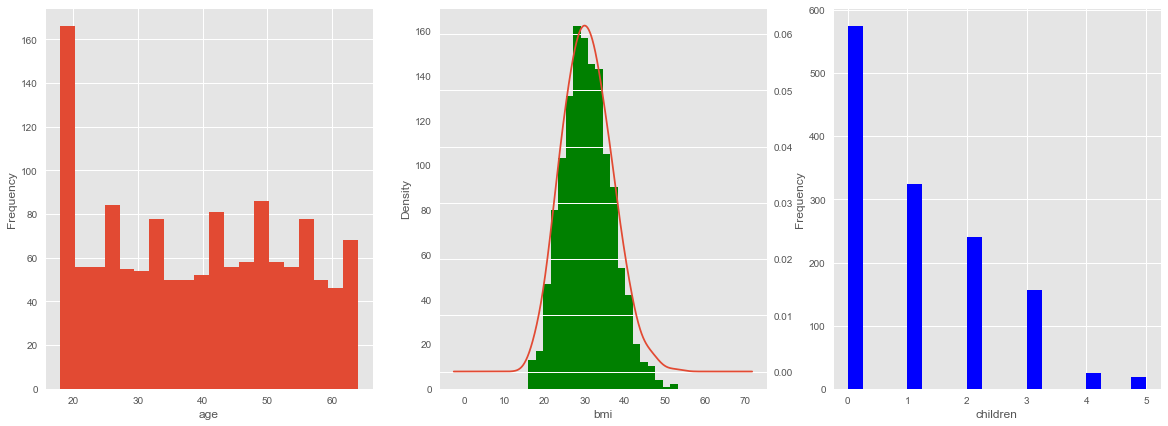

In [264]:
plt.style.use('ggplot')

# Get the age frequency distribution
# plt.subplot(1)
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
hist = df.age.plot.hist(bins=20)
hist.set_xlabel('age')

plt.subplot(1,3,2)
hist = df.bmi.plot.hist(bins=20, color='green')
kde = df.bmi.plot.kde(secondary_y=True, bw_method=0.3)
hist.set_xlabel('bmi')

plt.subplot(1,3,3)
hist = df.children.plot.hist(bins=20, color='blue')
hist.set_xlabel('children')

# can't set the xlabel name if use function loop

# attr_to_plot = ['age','bmi', 'children']
# for index, attr in enumerate(attr_to_plot):
#     plt.subplot(1,3,index+1)
#     hist = df[attr].plot.hist(bins=20)
#     hist.set_xlabel = attr_to_plot[index]

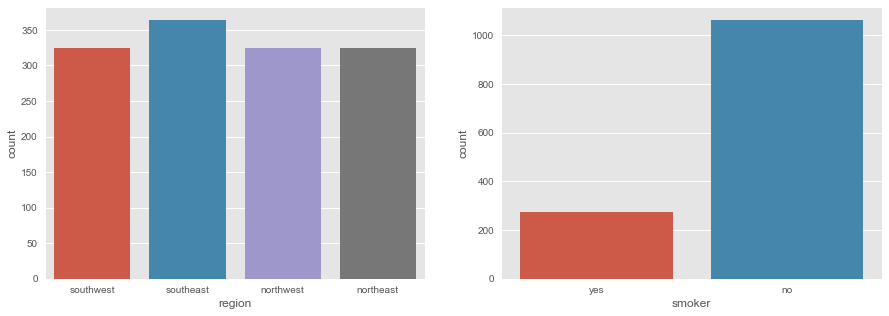

In [265]:
# subplot for seaborn
f, axes = plt.subplots(1, 2)

# change the fig_size of seaborn plot
f.set_size_inches(15,5)

sns.countplot(ax=axes[0], x='region', data=df)
sns.countplot(ax=axes[1], x='smoker', data=df)


In [273]:
# 这个保险数据没有missing value，但是可以手动制造missing value
# show the rows with NaN in any columns
print(df[df.isnull().any(axis=1)].shape)
print(df.shape)
df2 = df.dropna()
df2.shape

(1, 8)
(1338, 8)


(1337, 8)

In [274]:
# sns.stripplot(x='age_range',y='age_range',data=df2)
df.groupby(by='age_range').count()

,age,sex,bmi,children,smoker,region,charges
age_range,,,,,,,
teenager,166,166,166,166,166,166,166
young_adult,278,278,278,278,278,278,278
adult,538,538,538,538,537,538,538
senior,356,356,356,356,356,356,356


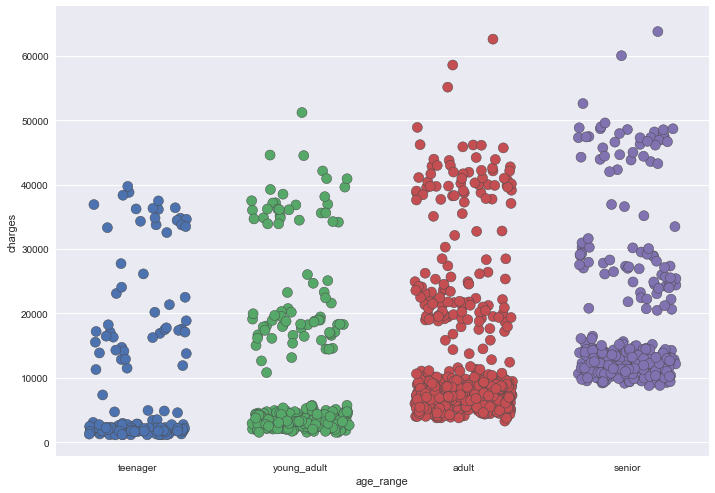

In [276]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# jitter can make the distribution more clear
sns.stripplot(x='age_range', y='charges', data=df2, linewidth=0.5, size=10, jitter=0.3)


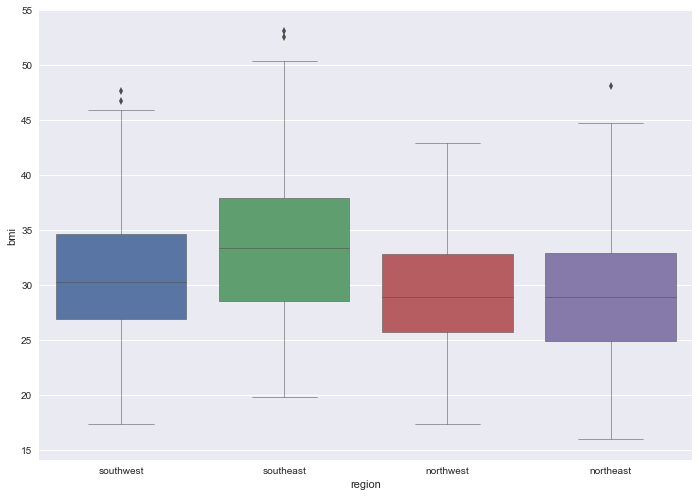

In [277]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# jitter can make the distribution more clear
sns.boxplot(x='region', y='bmi', data=df2, linewidth=0.5)

Text(0.5,1,'Relation of age and region')

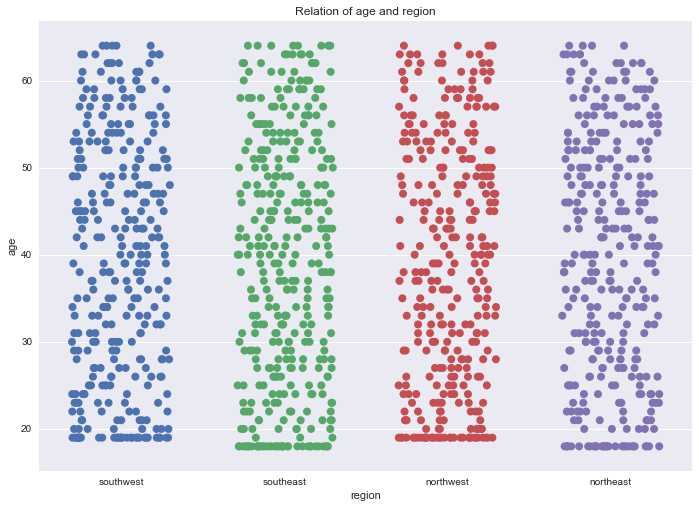

In [278]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.stripplot(x='region', y='age', data=df, jitter=0.3, size=8).set_title('Relation of age and region')


Text(0.5,1,'Relation of region and charges')

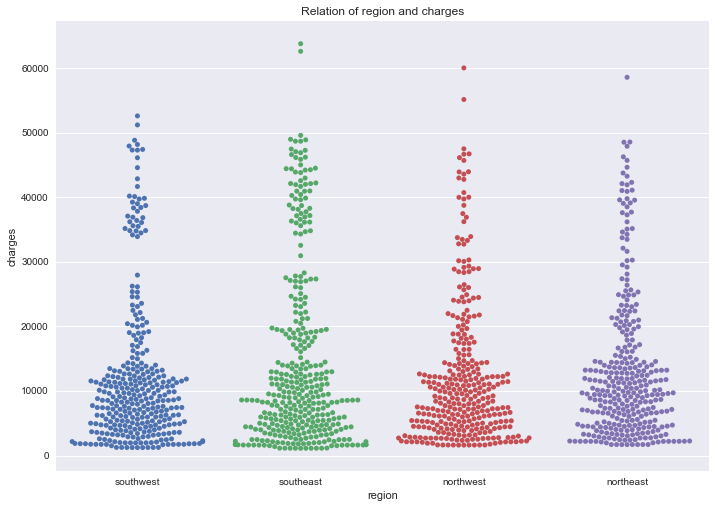

In [279]:
sns.swarmplot(x='region',y='charges', data=df).set_title('Relation of region and charges')

Text(0.5,1,'Relation of age_range and bmi')

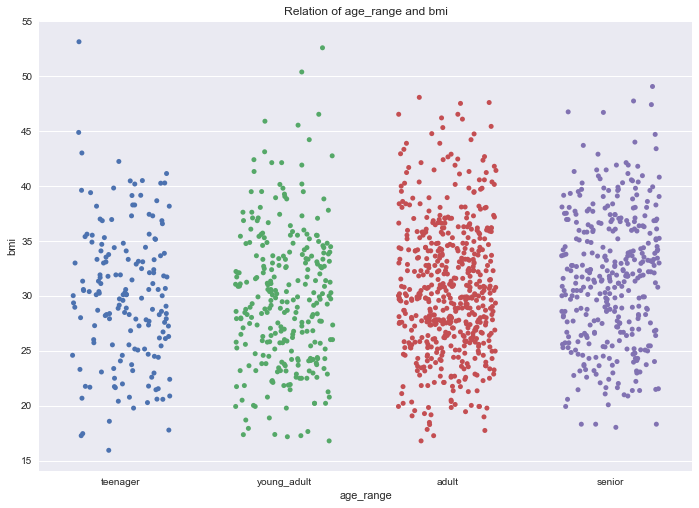

In [280]:
sns.stripplot(x='age_range',y='bmi',data=df,jitter=0.3).set_title('Relation of age_range and bmi')

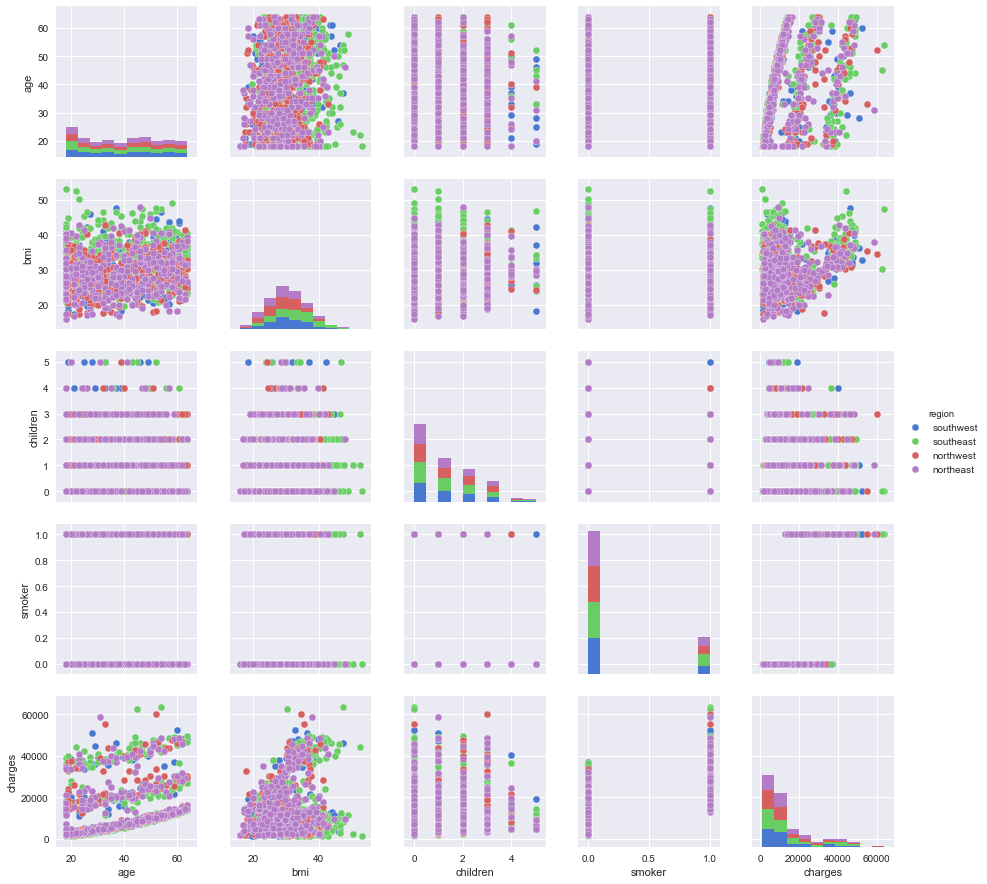

In [338]:
# plot pairwise relationships in a dataset
sns.set_palette('muted')
sns.pairplot(df3, hue='region')

In [292]:
# Change the value of df[smoker], 'yes' -> 1, 'no' -> 0
df3 = df2.replace(to_replace={'yes':1, 'no':0})
df3.info()
# df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
age          1337 non-null int64
sex          1337 non-null object
bmi          1337 non-null float64
children     1337 non-null int64
smoker       1337 non-null int64
region       1337 non-null object
charges      1337 non-null float64
age_range    1337 non-null category
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 125.1+ KB


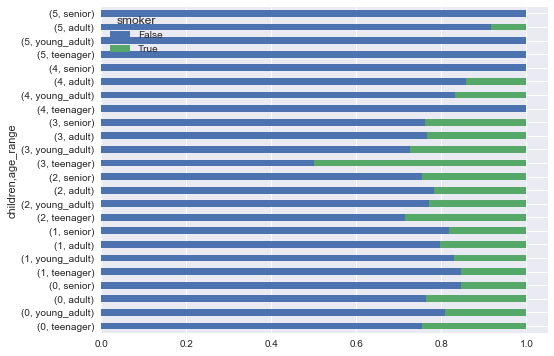

In [316]:
df_group1 = df3.groupby(by=['age_range','children'])
df_group1.count()
smoke = pd.crosstab([df3['children'], df3['age_range']], df3['smoker'].astype(bool))
smoke_rate = smoke.div(smoke.sum(1).astype(float),axis=0)
smoke_rate.plot(kind='barh', stacked=True, figsize=(8,6))
plt.show()

In [339]:
df_group1.count()

age  sex  bmi  smoker  region  charges
age_range   children                                        
teenager    0         118  118  118     118     118      118
            1          26   26   26      26      26       26
            2          14   14   14      14      14       14
            3           4    4    4       4       4        4
            4           1    1    1       1       1        1
            5           3    3    3       3       3        3
young_adult 0         130  130  130     130     130      130
            1          59   59   59      59      59       59
            2          48   48   48      48      48       48
            3          33   33   33      33      33       33
            4           6    6    6       6       6        6
            5           2    2    2       2       2        2
adult       0         132  132  132     132     132      132
            1         173  173  173     173     173      173
            2         133  133  133     133     133      133
            3          73   73   73      73      73       73
            4          14   14   14      14      14       14
            5          12   12   12      12      12       12
senior      0         194  194  194     194     194      194
            1          66   66   66      66      66       66
            2          45   45   45      45      45       45
            3          46   46   46      46      46       46
            4           4    4    4       4       4        4
            5           1    1    1       1       1        1

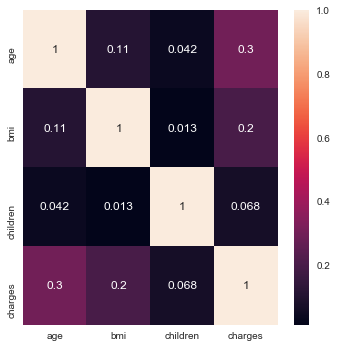

In [162]:
cmap = sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(5, 5))
# df.corr() will exclude the NaN/null or object datatypes
sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()

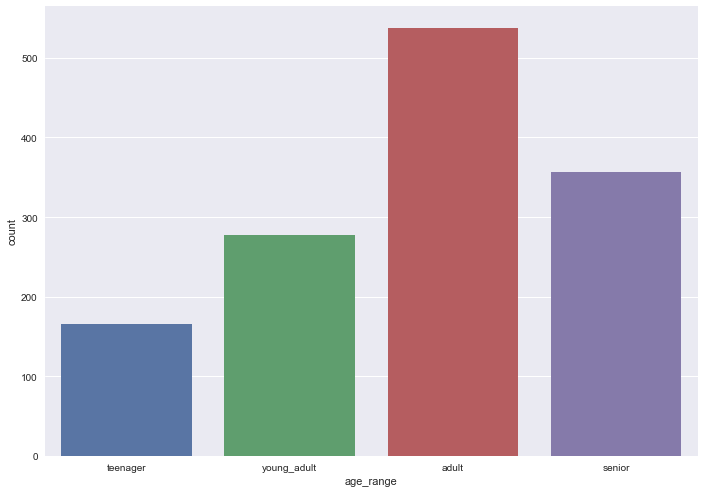

In [196]:
# Get the frequency of each age_range category
sns.countplot(x='age_range', data=df)

In [13]:
df_grouped = df.groupby(by=['age_range','region'])
df_grouped.count()

age  sex  bmi  children  smoker  charges
age_range   region                                             
teenager    northeast   38   38   38        38      38       38
            northwest   41   41   41        41      41       41
            southeast   48   48   48        48      48       48
            southwest   39   39   39        39      39       39
young_adult northeast   69   69   69        69      69       69
            northwest   67   67   67        67      67       67
            southeast   75   75   75        75      75       75
            southwest   67   67   67        67      67       67
adult       northeast  130  130  130       130     130      130
            northwest  130  130  130       130     130      130
            southeast  147  147  147       147     147      147
            southwest  131  131  131       131     131      131
senior      northeast   87   87   87        87      87       87
            northwest   87   87   87        87      87       87
            southeast   94   94   94        94      94       94
            southwest   88   88   88        88      88       88

In [14]:
print(df_grouped.charges.sum()/df_grouped.charges.count())

age_range    region   
teenager     northeast     7608.913794
             northwest     9773.071070
             southeast     9072.669419
             southwest     8233.725907
young_adult  northeast     9612.946043
             northwest     7232.214783
             southeast    11807.138251
             southwest    10338.626777
adult        northeast    14336.166067
             northwest    12346.491262
             southeast    13984.394953
             southwest    12371.029906
senior       northeast    17557.873488
             northwest    17763.377335
             southeast    21137.874514
             southwest    15663.027562
Name: charges, dtype: float64


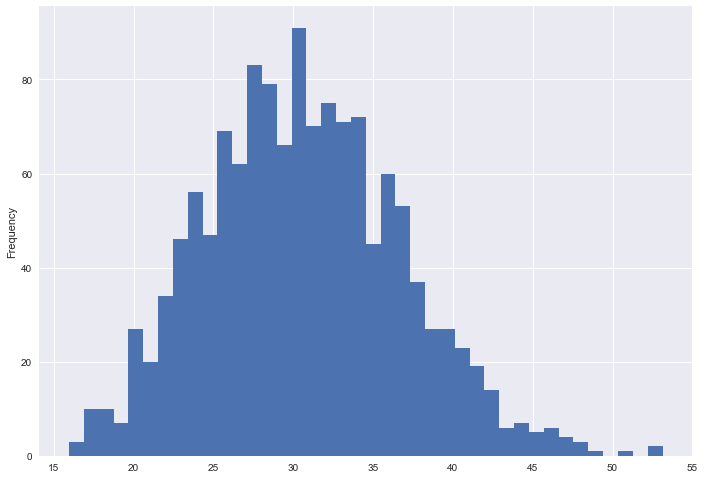

In [198]:
df.bmi.plot.hist(bins=40)

In [199]:
# define different category of bmi level
df['bmi_range'] = pd.cut(df.bmi, [0, 18.5, 25, 30, 50], labels=['underweight', 'healthweight', 'overweight', 'obese'])
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,teenager,overweight
1,18,male,33.770,1,no,southeast,1725.55230,teenager,obese
2,28,male,33.000,3,no,southeast,4449.46200,young_adult,obese
3,33,male,22.705,0,no,northwest,21984.47061,adult,healthweight
4,32,male,28.880,0,no,northwest,3866.85520,adult,overweight


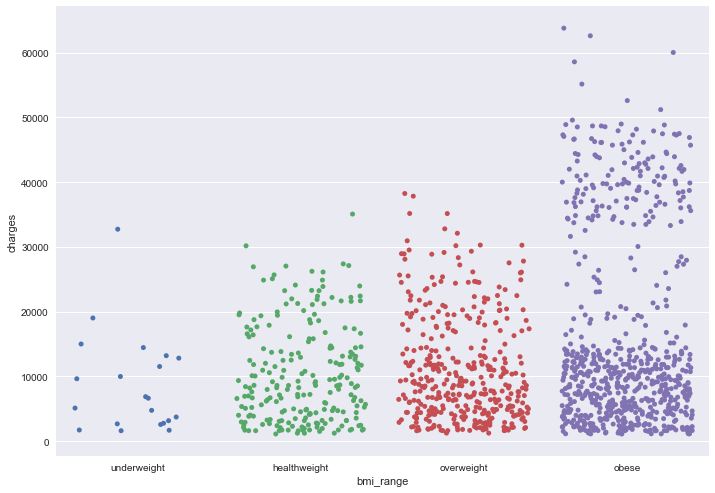

In [204]:
sns.stripplot(x='bmi_range', y='charges', data=df, jitter=0.4)

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age          1338 non-null int64
sex          1338 non-null object
bmi          1338 non-null float64
children     1338 non-null int64
smoker       1337 non-null object
region       1338 non-null object
charges      1338 non-null float64
age_range    1338 non-null category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 74.7+ KB
